# Offline comparison of KF2, KF3 and KF4 algorithms ( Filtering )
This uses a downloaded binary IBG datalog as input data. In this example, the vario is using a MS5611 barometric sensor. The code is executed in an Ubuntu 20.04 console terminal.

In `config.h` choose the algorithm to run and set LOG_INPUT_OUTPUT to 1.

E.g. if you want to run the KF2 algorithm,
```
// choose one of the following tests
// print the kalman filter P convergence over first 512 samples of data
#define LOG_CONVERGENCE    0
// print the baro sensor derived altitude cm, and kalman filter estimates for z and v, for all samples
#define LOG_INPUT_OUTPUT   1

// choose one of the following algorithms  
// for LOG_CONVERGENCE run, only KF3 and KF4 are valid
#define USE_KF2 1
#define USE_KF3 0
#define USE_KF4 0
```
Build the code :
```
g++ -o kf_compare kf_compare.cpp kalmanfilter2.cpp kalmanfilter3.cpp kalmanfilter4.cpp imu.cpp ringbuf.cpp -lm
```
Generate the results :
```
./kf_compare ./ms5611_datalog > kf2_ms5611_inout.txt
```

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
z = []
z_kf2 = []
v_kf2 = []
with open('kf2_ms5611_inout.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z.append(float(row[0]))
        z_kf2.append(float(row[1]))
        v_kf2.append(float(row[2]))
z = np.array(z)        
z_kf2 = np.array(z_kf2)
v_kf2 = np.array(v_kf2)        

In [3]:
z_kf3 = []
v_kf3 = []
with open('kf3_ms5611_inout.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z_kf3.append(float(row[1]))
        v_kf3.append(float(row[2]))
z_kf3 = np.array(z_kf3)
v_kf3 = np.array(v_kf3)        

In [4]:
z_kf4 = []
v_kf4 = []
with open('kf4_ms5611_inout.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        z_kf4.append(float(row[1]))
        v_kf4.append(float(row[2]))
z_kf4 = np.array(z_kf4)
v_kf4 = np.array(v_kf4)   

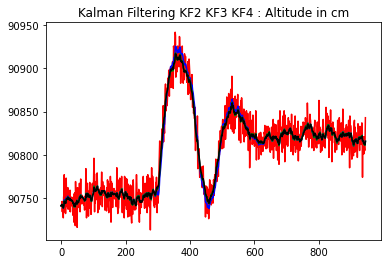

In [5]:
plt.plot(z, color='red')
plt.plot(z_kf2, color='blue')
plt.plot(z_kf3, color='green')
plt.plot(z_kf4, color='black')
plt.title('Kalman Filtering KF2 KF3 KF4 : Altitude in cm')
plt.show()

## Zoomed in window
KF2 shows the laggy overshoots, while KF3 and KF4 do not

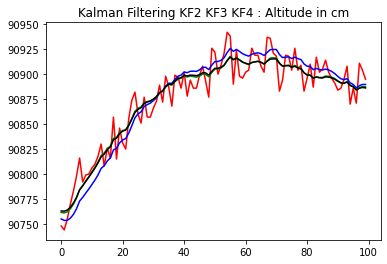

In [6]:
plt.plot(z[300:400], color='red')
plt.plot(z_kf2[300:400], color='blue')
plt.plot(z_kf3[300:400], color='green')
plt.plot(z_kf4[300:400], color='black')
plt.title('Kalman Filtering KF2 KF3 KF4 : Altitude in cm')
plt.show()

## Climb/sink rate estimation
Here the KF2 filter lag is clearly visible even without zooming in. The difference is even more perceptible for variometer audio feedback.

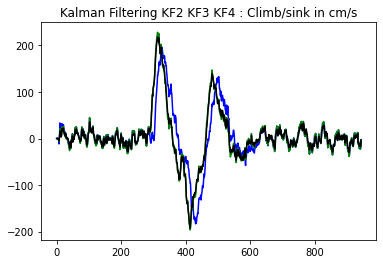

In [7]:
plt.plot(v_kf2, color='blue')
plt.plot(v_kf3, color='green')
plt.plot(v_kf4, color='black')
plt.title('Kalman Filtering KF2 KF3 KF4 : Climb/sink in cm/s')
plt.show()

When zoomed in, you can clearly see the difference in response. The sample interval is 20mS. KF2 responds to the falling variometer nearly 0.5 seconds later. This demonstrates the benefit of fusing acceleration and altitude readings for minimum-lag variometer response.

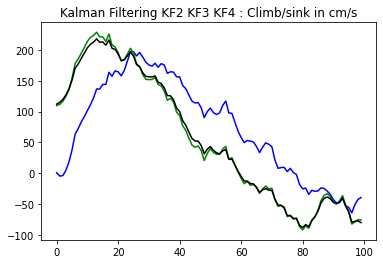

In [8]:
plt.plot(v_kf2[300:400], color='blue')
plt.plot(v_kf3[300:400], color='green')
plt.plot(v_kf4[300:400], color='black')
plt.title('Kalman Filtering KF2 KF3 KF4 : Climb/sink in cm/s')
plt.show()